In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [7]:
df.shape

(2930, 82)

In [8]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
input_number = SimpleImputer(strategy = 'median')
df[num_cols] = input_number.fit_transform(df[num_cols])

In [9]:
cats_cols = df.select_dtypes(include = 'object').columns
imputer_cats = SimpleImputer(strategy = 'most_frequent')
df[cats_cols] = imputer_cats.fit_transform(df[cats_cols])

In [10]:
df['SalePrice'] = np.log1p(df['SalePrice'])

In [11]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,...,False,False,False,False,True,False,False,False,True,False


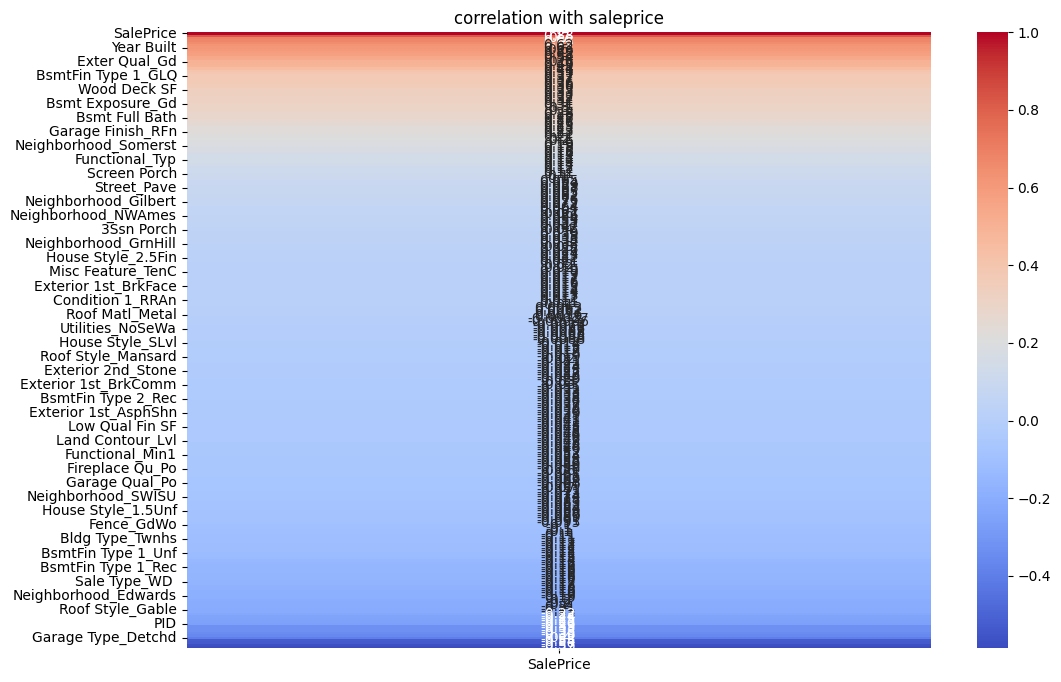

In [12]:
correleation = df.corr(numeric_only = True)

plt.figure(figsize = (12,8))

sns.heatmap(correleation[['SalePrice']].sort_values(by = 'SalePrice',ascending = False),annot = True,cmap = 'coolwarm')

plt.title('correlation with saleprice')
plt.show()

In [13]:
X = df.drop('SalePrice',axis = 1)
y = df['SalePrice']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [15]:
model = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [16]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred_log  = model.predict(X_test)


In [18]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log ))
r2_log = r2_score(y_test, y_pred_log )

In [19]:
rmse_log

0.12225413294014974

In [20]:
r2_log

0.9192232015012769

In [21]:
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

In [22]:
rmse_real = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2_real = r2_score(y_test_original, y_pred_original)

In [23]:
rmse_real

27420.89681355871

In [24]:
r2_real

0.9062175133171044